<a href="https://colab.research.google.com/github/cpvivek/Onlie-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation__Vivek_CP_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

#Methodology

RFM: Recency Frequency and Monetory Value.

RFM is a common market research methodology used to segment the customer base. It makes use of Recency (How recent the last purchase was?), Frequency (How frequent are the purchases?) and Monetory value (Monetory value of the purchase) and condenses them into a score which can further be used to create different segments so that the company can focus accordingly on these segments. 

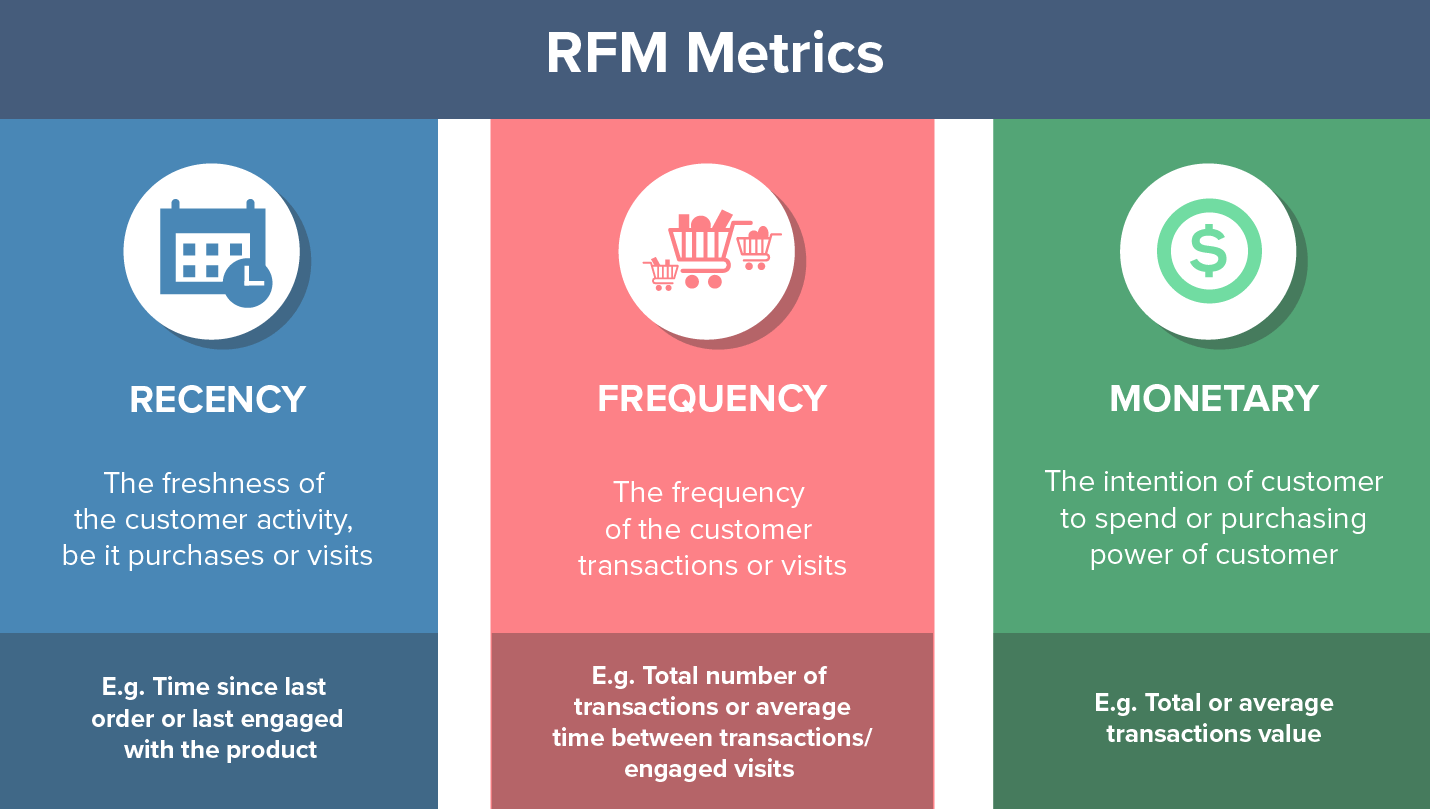

This will be coupled with K means clustering to arrive at the clusters.

References:

[Clevertap](https://clevertap.com/blog/rfm-analysis/)

[AIUniversity YouTube Chanel](https://www.youtube.com/channel/UCv6Uw36LRbYnX4HDxKPguKg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Alma Better Pro/Alma Better Pro Program/Module 4: Machine Learning/Data Sets/Online Retail.csv')

Let's explore the dataset

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 8.26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 8.26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 8.26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 8.26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 8.26,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Let's look into null values

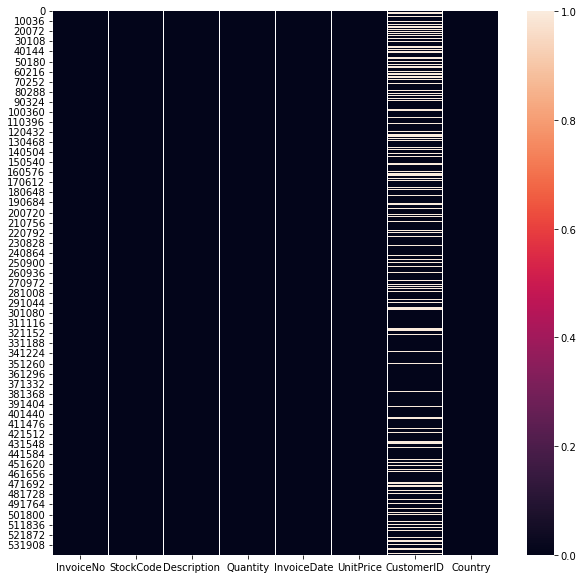

In [8]:
null_values=df.isnull()
plt.figure(figsize=(10,10))
sns.heatmap(null_values)

There is an abundant oncentratio of null values in CustomerID. We can go ahead and drop this null values since CustomerID as it is, wouldn't contribute to segmenting the customers anyway

In [9]:
df.dropna(inplace=True)

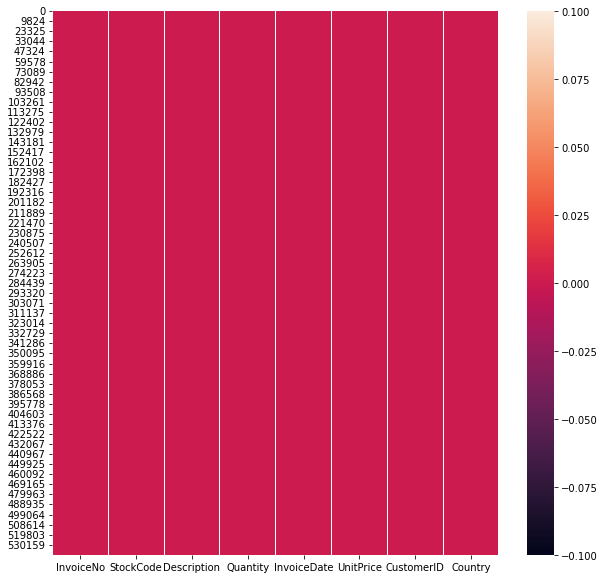

In [10]:
null_values=df.isnull()
plt.figure(figsize=(10,10))
sns.heatmap(null_values)

Our dataset is free of null values now.

In [11]:
df.shape

(406829, 8)

We have come down from 541909 to 406829 rows. Since the number still is quite high, it shouldn't be a problem.

Let's look into the features we have in hand

Description

In [12]:
df['Description'].unique

<bound method Series.unique of 0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 406829, dtype: object>

In [13]:
len(df['Description'].unique())

3896

We have 3896 products with distinct descriptions

Quantity

In [14]:
df['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     -4,     -5,     -7,     -3,
           11,     70,    252,     60,    216,    384,     27,    108,
           52,  -9360,     75,    270,     42,    240,     90,    320,
           17,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     19,     39,    -48,    -50,     56,     13,
         1440,     -8,     15,    720,    -20,    156,    324,     41,
          -10,    -72,    -11,    402,    378,    150,    300,     22,
           34,    408,    972,    208,   1008,     26,   1000,    -25,
         1488,    250,   1394,    400,    110,    -14,     37,    -33,
      

We can observe some negative values in the quantity. These might be instances where customers return the products, but I can't be sure and the dataset description doesn't mention about same. So for sake of simplicity I'd be removing these instances and keep only quantities greater than 0.

In [15]:
df=df[df.Quantity>0]

In [16]:
df.shape

(397924, 8)

We have come down to 397924 rows now

Invoice Date

In [17]:
df['InvoiceDate']

0          01-12-2010 8.26
1          01-12-2010 8.26
2          01-12-2010 8.26
3          01-12-2010 8.26
4          01-12-2010 8.26
                ...       
541904    09-12-2011 12.50
541905    09-12-2011 12.50
541906    09-12-2011 12.50
541907    09-12-2011 12.50
541908    09-12-2011 12.50
Name: InvoiceDate, Length: 397924, dtype: object

The data in hand is from 1-12-2010 to 9-12-2011. 
Let's create Year month and date column as well

In [18]:
#Removing the time from invoice date to be able to convert string type to datetime object
df['InvoiceDate']=df['InvoiceDate'].apply(lambda x: x[:][:-5])

In [19]:
#convering to datetime object
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [20]:
df['Month']=df['InvoiceDate'].dt.month
df['Day']=df['InvoiceDate'].dt.day
df['Year']=df['InvoiceDate'].dt.year

Now we can look into sales in different months

In [21]:
monthly_activity=df.groupby('Month')['CustomerID'].count().reset_index().rename(columns={'CustomerID':'CustomerCount'})
monthly_activity

,Month,CustomerCount
0,1,27096
1,2,24747
2,3,28584
3,4,27276
4,5,32574
5,6,34482
6,7,33378
7,8,31555
8,9,39615
9,10,44432


In [22]:
px.line(monthly_activity,x="Month",y="CustomerCount",title='Customer activity over the months')

We can see that month of november accounts for highest activity. The numbers in december might have gone down owing to lack of data.

We can add another column depicting the value churned (Sales) from customer in a single transaction as product of quantity and Price

In [23]:
df['Sales']=df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Year,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,1,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,1,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,1,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,1,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,1,12,2010,20.34


In [24]:
country_sales=df.groupby('Country')['Sales'].sum().reset_index().sort_values('Sales',ascending=False)
country_sales

,Country,Sales
35,United Kingdom,7308391.554
23,Netherlands,285446.340
10,EIRE,265545.900
14,Germany,228867.140
13,France,209024.050
0,Australia,138521.310
30,Spain,61577.110
32,Switzerland,56443.950
3,Belgium,41196.340
31,Sweden,38378.330


In [25]:
px.bar(country_sales,x="Country",y="Sales",title="Sales in different Countries")

The company has highest sales in UK followed by Netherlands, EIRE, Germany, France, Australia, Spain and negligible contributions by rest of the countries.

# Monetory Value

In [30]:
monetory_value=df.groupby('CustomerID')['Sales'].sum().reset_index().rename(columns={'Sales':'Monetory Value'})
monetory_value

,CustomerID,Monetory Value
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


There are some obvious instances of outliers here. We'll deal with them all once our final dataset is ready.

#Frequency


In [44]:
cust_frequency=df.groupby('CustomerID')['Sales'].count().reset_index().rename(columns={'Sales':'Frequency'})
cust_frequency

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


#Recency

In [70]:
recency=df.groupby('CustomerID')['InvoiceDate'].max().reset_index().rename(columns={'InvoiceDate':'LatestDate'})
import datetime as dt
last_date=df['InvoiceDate'].max()
recency['Recency']=last_date-recency['LatestDate']
recency.drop('LatestDate',axis=1,inplace=True)
recency

,CustomerID,Recency
0,12346.0,326 days
1,12347.0,40 days
2,12348.0,76 days
3,12349.0,19 days
4,12350.0,311 days
...,...,...
4334,18280.0,160 days
4335,18281.0,4 days
4336,18282.0,216 days
4337,18283.0,10 days


Let's merge the three dataframe to a single dataframe

In [78]:
RFM_df=recency.merge(cust_frequency,on='CustomerID',how='right')
RFM_df=RFM_df.merge(monetory_value ,on='CustomerID',how='right')
RFM_df

,CustomerID,Recency,Frequency,Monetory Value
0,12346.0,326 days,1,77183.60
1,12347.0,40 days,182,4310.00
2,12348.0,76 days,31,1797.24
3,12349.0,19 days,73,1757.55
4,12350.0,311 days,17,334.40
...,...,...,...,...
4334,18280.0,160 days,10,180.60
4335,18281.0,4 days,7,80.82
4336,18282.0,216 days,12,178.05
4337,18283.0,10 days,756,2094.88
